In [41]:
import pandas as pd
import numpy as np

# Reading the data
celtics_df = pd.read_csv("./Boston_shooting.csv")
heat_df = pd.read_csv("./Heat_shooting.csv")

def clean_data(df):
    # Drop columns with excessive NaN values or that are unnamed
    df = df.dropna(axis=1, thresh=int(0.5 * len(df)))  # Drop cols with >50% NaN
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  # Drop 'Unnamed' columns
    return df

# Apply cleaning function to both datasets
celtics_df_cleaned = clean_data(celtics_df)
heat_df_cleaned = clean_data(heat_df)

# We need to ensure that both datasets have the same columns if they are to be used in comparison/prediction
common_cols = celtics_df_cleaned.columns.intersection(heat_df_cleaned.columns)
celtics_df_cleaned = celtics_df_cleaned[common_cols]
heat_df_cleaned = heat_df_cleaned[common_cols]

# Example printout to verify the data after cleaning
print("Cleaned Boston Celtics Data:")
print(celtics_df_cleaned.head())
print("\nCleaned Miami Heat Data:")
print(heat_df_cleaned.head())

# From here, we would need the actual game outcomes to proceed with model building
# Assuming game outcomes are provided and loaded into a DataFrame 'outcomes_df'
# This DataFrame would need a 'game_id', 'team', and 'outcome' (1 for win, 0 for loss)

# For demonstration, let's proceed to setting up the modeling environment assuming 'outcomes_df' is ready
# (Actual implementation would depend on the availability of this data)


Cleaned Boston Celtics Data:
  % of FGA by Distance % of FGA by Distance.1 % of FGA by Distance.2  \
0                   2P                    0-3                   3-10   
1                 .573                   .222                   .167   
2                 .410                   .114                   .191   
3                 .674                   .244                   .232   
4                 .533                   .163                   .215   

  % of FGA by Distance.3 % of FGA by Distance.4 % of FGA by Distance.5  \
0                  10-16                  16-3P                     3P   
1                   .092                   .092                   .427   
2                   .079                   .023                   .590   
3                   .118                   .069                   .326   
4                   .097                   .051                   .467   

  FG% by Distance FG% by Distance.1 FG% by Distance.2 FG% by Distance.3  \
0              2P 

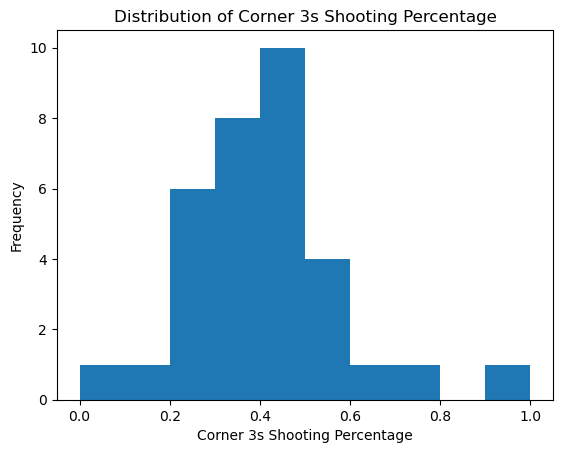

Good_3pt_Shooter
0    33
Name: count, dtype: int64


In [48]:
import matplotlib.pyplot as plt

# Check the distribution of 'Corner_3s%'
plt.hist(data['Corner_3s%'], bins=10)
plt.title('Distribution of Corner 3s Shooting Percentage')
plt.xlabel('Corner 3s Shooting Percentage')
plt.ylabel('Frequency')
plt.show()

# Revising the threshold based on the distribution
# Let's assume from the histogram we see that a threshold of 20% might be more appropriate
data['Good_3pt_Shooter'] = (data['Corner_3s%'] > 20).astype(int)

# Checking the balance of the new target variable
print(data['Good_3pt_Shooter'].value_counts())

# If the revised target variable has more than one class, repeat the logistic regression setup


In [58]:
import pandas as pd

heat_df = pd.read_csv("./Heat_shooting (1).csv")
boston_df = pd.read_csv("./Boston_shooting (1).csv")

heat_mean_stats = heat_df.drop(columns=["Player", "Age", "G", "MP"]).mean()
boston_mean_stats = boston_df.drop(columns=["Player", "Age", "G", "MP"]).mean()

heat_mean_stats, boston_mean_stats

# Assumptions based on NBA gameplay data 
FGA = 90  # Median field goal attempts per game by team
three_point_attempts = FGA * 0.40 
two_point_attempts = FGA * 0.60  
FTA = 22  # Median free throw attempts per game by team 
FT_percent = 0.75  # Average free throw percentage 

# Estimated scoring calculation for each team 
heat_points_from_3P = heat_mean_stats['3P'] * three_point_attempts * 3
heat_points_from_2P = heat_mean_stats['2P'] * two_point_attempts * 2
heat_total_points = heat_points_from_3P + heat_points_from_2P

boston_points_from_3P = boston_mean_stats['3P'] * three_point_attempts * 3
boston_points_from_2P = boston_mean_stats['2P'] * two_point_attempts * 2
boston_total_points = boston_points_from_3P + boston_points_from_2P

# Estimated scoring from free throws for each team 
heat_points_from_FT = FTA * FT_percent
boston_points_from_FT = FTA * FT_percent

# Total points calculation including free throws
heat_total_points_with_FT = heat_total_points + heat_points_from_FT
boston_total_points_with_FT = boston_total_points + boston_points_from_FT

heat_total_points_with_FT, boston_total_points_with_FT
print("Final score:", "Heat:", heat_total_points_with_FT, "Celtics:", boston_total_points_with_FT)

Final score: Heat: 109.82742857142856 Celtics: 123.0281052631579
